In [5]:
# Base Imports
import os
import sys
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Model Imports
import category_encoders as ce
import xgboost as xgb
import sklearn as sk

random_seed = 42
np.random.seed(random_seed)

In [2]:
# Loading the data

df_train_base = pd.read_csv('data/train.csv')
df_test_base = pd.read_csv('data/test.csv')

In [6]:
# Encoding Functions

def circular_encoder(df):
    # Encode dow and hour as sin and cos
    
    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 6.0)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 6.0)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 23.0)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 23.0)
    df.drop(['day_of_week', 'hour'], axis=1, inplace=True)
    
    return df

def one_hot_encoder(df):
    # Encode PULocationID and DOLocationID as one-hot
    
    encoder = ce.OneHotEncoder(cols=['PULocationID', 'DOLocationID'], use_cat_names=True)
    df = encoder.fit_transform(df)
    
    return df

def target_encoder(df, target_column):
    # Encode PULocationID and DOLocationID as target
    
    encoder = ce.TargetEncoder(cols=['PULocationID', 'DOLocationID'])
    df = encoder.fit_transform(df, df[target_column])
    
    return df

In [7]:
# Models based only on circluar encoding

def total_amount_model(df_train_base, df_test_base):
    
    # Copy the dataframes to avoid modifying the original ones
    df_train = df_train_base.copy()
    df_test = df_test_base.copy()

    df_train = circular_encoder(df_train)
    df_test = circular_encoder(df_test)
    
    X_train= df_train.drop(['travel_time', 'total_amount'], axis=1)
    y_train = df_train['total_amount']
    
    X_test = df_test.drop(['travel_time', 'total_amount'], axis=1)
    y_test = df_test['total_amount']
    
    model = xgb.XGBRegressor()
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    print('Training time for Total Amount model:', end - start)
    
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Sample train predictions and plot
    sample_size = 20
    sample_indices = np.random.choice(X_train.index, size=sample_size, replace=False)
    sample_y_train = y_train.loc[sample_indices]
    sample_y_train_pred = y_train_pred[sample_indices]
    plt.figure(figsize=(10, 5))
    plt.scatter(sample_y_train, sample_y_train_pred, alpha=0.5)
    plt.xlabel('True Total Amount')
    plt.ylabel('Predicted Total Amount')
    plt.title('Train Predictions')
    plt.plot([sample_y_train.min(), sample_y_train.max()], [sample_y_train.min(), sample_y_train.max()], 'r--')
    plt.show()
    
    # Sample test predictions and plot
    sample_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
    sample_y_test = y_test.loc[sample_indices]
    sample_y_test_pred = y_test_pred[sample_indices]
    plt.figure(figsize=(10, 5))
    plt.scatter(sample_y_test, sample_y_test_pred, alpha=0.5)
    plt.xlabel('True Total Amount')
    plt.ylabel('Predicted Total Amount')
    plt.title('Test Predictions')
    plt.plot([sample_y_test.min(), sample_y_test.max()], [sample_y_test.min(), sample_y_test.max()], 'r--')
    plt.show()
    
    
    
    

def travel_time_model(df_train, df_test):

        # Copy the dataframes to avoid modifying the original ones
    df_train = df_train_base.copy()
    df_test = df_test_base.copy()

    df_train = circular_encoder(df_train)
    df_test = circular_encoder(df_test)
    
    X_train= df_train.drop(['travel_time', 'total_amount'], axis=1)
    y_train = df_train['travel_time']
    
    X_test = df_test.drop(['travel_time', 'total_amount'], axis=1)
    y_test = df_test['travel_time']
    
    model = xgb.XGBRegressor()
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    print('Training time for Travel Time model:', end - start)
    
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Sample train predictions and plot
    sample_size = 20
    sample_indices = np.random.choice(X_train.index, size=sample_size, replace=False)
    sample_y_train = y_train.loc[sample_indices]
    sample_y_train_pred = y_train_pred[sample_indices]
    plt.figure(figsize=(10, 5))
    plt.scatter(sample_y_train, sample_y_train_pred, alpha=0.5)
    plt.xlabel('True Travel Time')
    plt.ylabel('Predicted Travel Time')
    plt.title('Train Predictions')
    plt.plot([sample_y_train.min(), sample_y_train.max()], [sample_y_train.min(), sample_y_train.max()], 'r--')
    plt.show()
    
    # Sample test predictions and plot
    sample_indices = np.random.choice(X_test.index, size=sample_size, replace=False)
    sample_y_test = y_test.loc[sample_indices]
    sample_y_test_pred = y_test_pred[sample_indices]
    plt.figure(figsize=(10, 5))
    plt.scatter(sample_y_test, sample_y_test_pred, alpha=0.5)
    plt.xlabel('True Travel Time')
    plt.ylabel('Predicted Travel Time')
    plt.title('Test Predictions')
    plt.plot([sample_y_test.min(), sample_y_test.max()], [sample_y_test.min(), sample_y_test.max()], 'r--')
    plt.show()
    
    

Training time for Total Amount model: 49.01681566238403
Train R^2: 0.8381334494340346
Test R^2: 0.7616270728217012


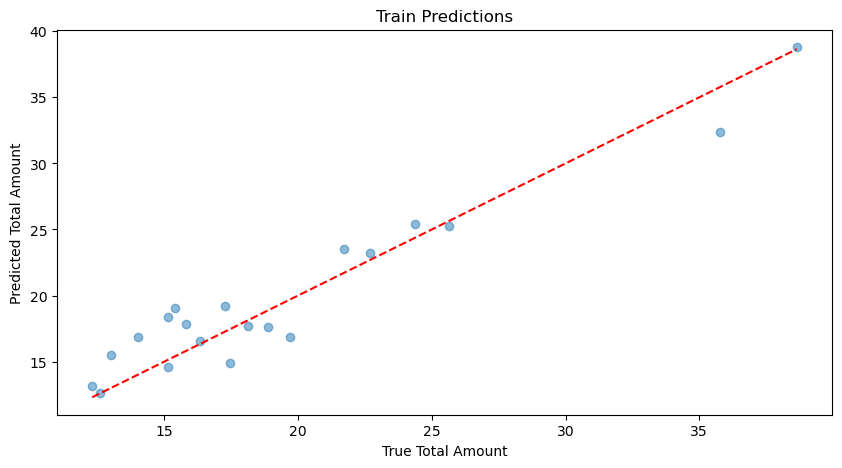

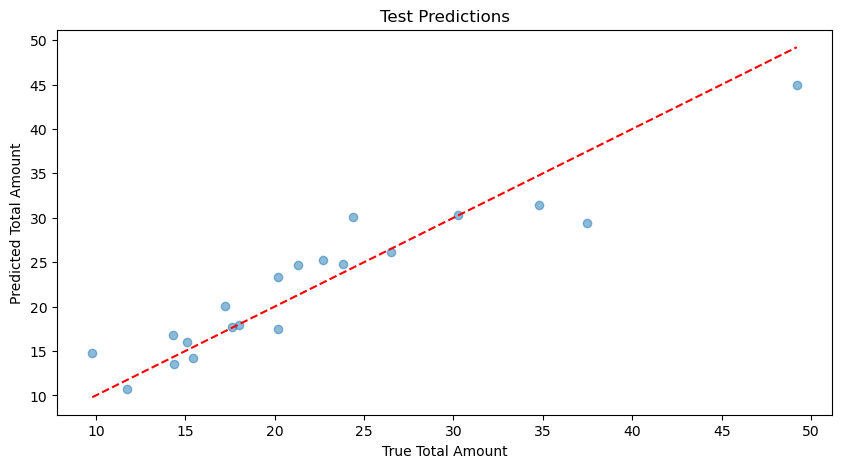

Training time for Travel Time model: 45.37679147720337
Train R^2: 0.7447347138690281
Test R^2: 0.7204279214865452


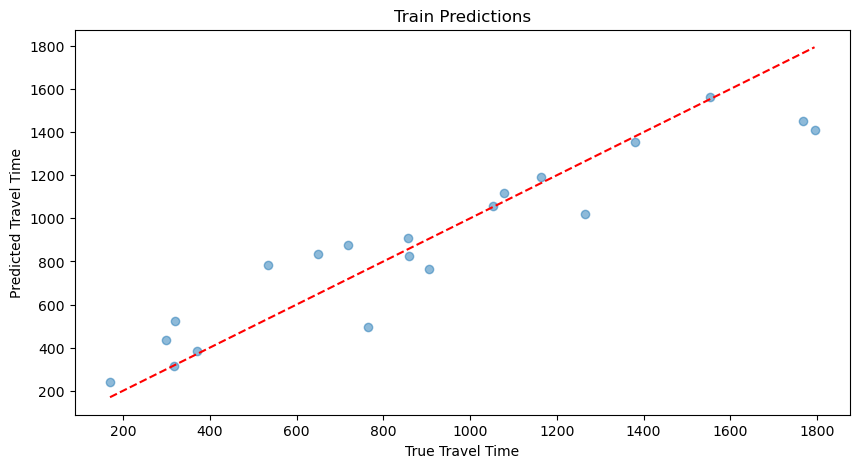

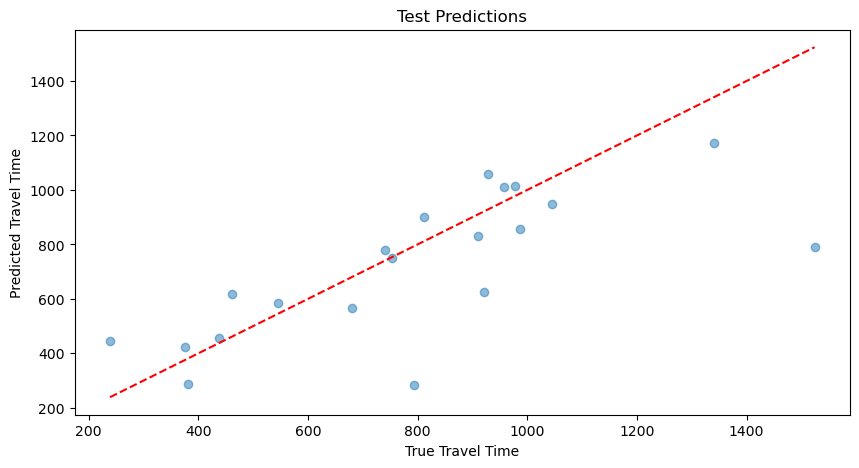

In [8]:
# Running base models
total_amount_model(df_train_base, df_test_base)

travel_time_model(df_train_base, df_test_base)

End of File